# Load Datasets

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

+ X_label IMG

In [101]:
def load(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=(150, 150))
    return img

In [102]:
d_path = 'D:\AlbumCover/'
img_dataset_cache = pd.read_csv('./dataset/img.csv')
img_dataset = img_dataset_cache.copy()

In [103]:
img_arr = None

for path in img_dataset['path']:
    if img_arr is None:
        img_arr = np.expand_dims(np.array(load(d_path + path)).flatten(), axis=0)
    else:
        img_arr = np.append(img_arr, np.expand_dims(np.array(load(d_path + path)).flatten(), axis=0), axis=0)

img_arr = img_arr/255.0

In [158]:
import cv2

hist_arr = None

for path in img_dataset['path']:
    if hist_arr is None:
        hist_arr = np.expand_dims(np.bincount(cv2.imread(d_path+path,0).ravel(),minlength=256), axis=0)
    else:
        hist_arr = np.append(hist_arr, np.expand_dims(np.bincount(cv2.imread(d_path+path,0).ravel(),minlength=256), axis=0), axis=0)

# img_arr = img_arr/255.0

In [166]:
from sklearn.preprocessing import MinMaxScaler

scarlar = MinMaxScaler()
scarlar.fit(hist_arr)
n = scarlar.transform(hist_arr)

1.0

In [159]:
img_arr.shape

(1205, 67500)

fac

In [2]:
pre_facial = pd.read_csv('./dataset/facial.csv')

if 'Unnamed: 0' in pre_facial.columns:
    pre_facial = pre_facial.drop('Unnamed: 0', axis=1)

In [3]:
imsi = pre_facial.copy()

# categorical data to one-hot
fac_input_df = pd.get_dummies(imsi, prefix=['gender', 'dominant_race'])

# Normalization
fac_input_norm = (fac_input_df - fac_input_df.mean()) / fac_input_df.std()

fac_input = np.array(fac_input_norm)

clr


In [4]:
clr_data = pd.read_csv('./dataset/clr.csv')
if 'Unnamed: 0' in clr_data.columns:
    clr_data = clr_data.drop('Unnamed: 0', axis=1)

In [5]:
clr_input = np.array( (clr_data - clr_data.mean())/clr_data.std() )

In [6]:
faclr = np.concatenate((clr_input,fac_input_df), axis=1)

+ y_label

In [8]:
y_data = pd.read_csv('./dataset/y_label.csv')

y_out = np.array(y_data)

img_arr = img_arr.astype('float64')

In [ ]:
y_out.shape

(1205, 11)

In [111]:
# y_data = pd.read_csv('./dataset/y_label.csv')

# y_out = np.array(y_data)

# img_arr = img_arr.astype('float64')

-----

In [112]:
xinput = np.concatenate((img_arr, fac_input, clr_input), axis=1)

In [12]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.ensemble import RakelD

In [13]:
classifier = RakelD(
    base_classifier=GaussianNB(),
    base_classifier_require_dense=[True, True],
    labelset_size=4,
    #dtype=object
)

In [147]:
a = np.array([1,2,3,4,5,6,7])
b = np.array([11,22,33,44,55,66,77])

In [11]:
import sklearn

faclrs = sklearn.utils.shuffle(faclr, random_state=123)
ys = sklearn.utils.shuffle(y_out, random_state=123)

xfaclrtest = faclrs[1100:]
ytest=ys[1100:]

xfaclrtrain = faclrs[:1100]
ytrain = ys[:1100]

In [171]:
import sklearn

img_arr_s = sklearn.utils.shuffle(img_arr, random_state=123)
input3_s = sklearn.utils.shuffle(xinput,random_state=123)
y_out_s = sklearn.utils.shuffle(y_out, random_state=123)
n = sklearn.utils.shuffle(n, random_state=123)


img_arr_test = img_arr_s[1100:]
input3_test = input3_s[1100:]
y_out_test = y_out_s[1100:]
n_test = n[1100:]

X_train = img_arr_s[:1100]
input3_train = input3_s[:1100]
y_train = y_out_s[:1100]
n_train = n[:1100]

In [14]:
classifier.fit(xfaclrtrain,ytrain)

c:\Users\cid2r\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(label_sets)


LabelSpacePartitioningClassifier(classifier=LabelPowerset(classifier=GaussianNB(),
                                                          require_dense=[True,
                                                                         True]),
                                 clusterer=RandomLabelSpaceClusterer(allow_overlap=False,
                                                                     cluster_count=3,
                                                                     cluster_size=4),
                                 require_dense=[False, False])

In [15]:
k =classifier.predict(xfaclrtest)

In [17]:
import sklearn.metrics as metrics

metrics.hamming_loss(ytest, k)

0.43203463203463205

In [175]:
metrics.label_ranking_loss(y_out_test,k.toarray())

0.7343537414965987

In [96]:
print(k)

  (0, 4)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 6)	1
  (2, 1)	1
  (2, 7)	1
  (3, 0)	1
  (3, 6)	1
  (3, 8)	1
  (4, 1)	1
  (4, 2)	1
  (4, 7)	1
  (4, 9)	1
  (4, 10)	1
  (5, 1)	1
  (5, 10)	1
  (6, 4)	1
  (6, 9)	1
  (7, 3)	1
  (7, 7)	1
  (7, 9)	1
  (8, 4)	1
  (8, 9)	1
  (9, 7)	1
  (9, 8)	1
  (10, 5)	1
  (10, 9)	1
  (11, 0)	1
  (11, 2)	1
  (11, 3)	1
  (11, 5)	1
  (11, 6)	1
  (12, 0)	1
  (12, 2)	1
  (12, 6)	1
  (13, 3)	1
  (13, 4)	1
  (13, 8)	1
  (14, 4)	1
  (14, 9)	1
  (15, 0)	1
  (15, 3)	1
  (15, 5)	1
  (16, 4)	1
  (16, 9)	1
  (17, 2)	1
  (17, 7)	1
  (17, 10)	1
  (18, 4)	1
  (18, 9)	1
  (19, 1)	1
  (19, 3)	1
  (19, 7)	1
  (20, 2)	1
  (20, 5)	1
  (21, 1)	1
  (21, 7)	1
  (21, 10)	1
  (22, 4)	1
  (22, 9)	1
  (23, 4)	1
  (23, 9)	1
  (24, 4)	1
  (24, 9)	1
  (25, 0)	1
  (25, 3)	1
  (25, 5)	1
  (25, 6)	1
  (26, 1)	1
  (26, 7)	1
  (26, 10)	1
  (27, 3)	1
  (27, 4)	1
  (27, 8)	1
  (28, 1)	1
  (29, 4)	1
  (29, 9)	1
  (30, 0)	1
  (30, 2)	1
  (30, 5)	1
  (30, 9)	1
  (31, 3)	1
  (31, 4)	1
  

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# onlyimg = KNeighborsClassifier(n_neighbors=2)
# threeinput = KNeighborsClassifier(n_neighbors=2)
# greyhist = KNeighborsClassifier(n_neighbors=2)
faclrmodel = KNeighborsClassifier(n_neighbors=2)

# onlyimg.fit(X_train, y_train)
# threeinput.fit(input3_train, y_train)
# greyhist.fit(n_train,y_train)
faclrmodel.fit(xfaclrtrain, ytrain)

# a = onlyimg.predict(img_arr_test)
# b = threeinput.predict(input3_test)
# c = greyhist.predict(n_test)
d = faclrmodel.predict(xfaclrtest)

In [144]:
onlyimg.score(img_arr_test, y_out_test)

0.0380952380952381

In [146]:
threeinput.score(input3_test,y_out_test)

0.06666666666666667

In [178]:
greyhist.score(n_test,y_out_test)

0.01904761904761905

In [19]:
faclrmodel.score(xfaclrtest, ytest)

0.01904761904761905

In [138]:
metrics.hamming_loss(y_out_test, a)

0.14025974025974025

In [139]:
metrics.hamming_loss(y_out_test, b)

0.1393939393939394

In [179]:
metrics.hamming_loss(y_out_test,c)

0.1445887445887446

In [143]:
metrics.label_ranking_loss(y_out_test,a)

0.925925925925926

In [142]:
metrics.label_ranking_loss(y_out_test,b)

0.9063492063492062

In [204]:
metrics.jaccard_score(y_out_test,b, average='weighted')

0.07242820119532448

In [20]:
metrics.jaccard_score(ytest,d,average='weighted')

0.06115319060082648

In [63]:
for i in y_out_test:
    print(i)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 0. 0. 0

In [71]:
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.naive_bayes import GaussianNB
from skmultilearn.ensemble import RakelD


from skmultilearn.problem_transform import ClassifierChain, LabelPowerset
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.cluster import NetworkXLabelGraphClusterer
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

parameters = {
    'classifier': [LabelPowerset(), ClassifierChain()],
    'classifier__classifier': [RandomForestClassifier()],
    'classifier__classifier__n_estimators': [10, 20, 50],
    'clusterer' : [
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False), 'louvain'),
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False), 'lpa')
    ]
}

In [78]:
clf = GridSearchCV(LabelSpacePartitioningClassifier(), parameters, scoring = 'f1_macro')

TypeError: hamming_loss() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [77]:
clf.fit(X_train, y_train)

ValueError: Invalid parameter k for estimator LabelSpacePartitioningClassifier(require_dense=[True, True]). Check the list of available parameters with `estimator.get_params().keys()`.

In [74]:
print (clf.best_params_, clf.best_score_)

{'classifier': LabelPowerset(classifier=RandomForestClassifier(n_estimators=20),
              require_dense=[True, True]), 'classifier__classifier': RandomForestClassifier(n_estimators=20), 'classifier__classifier__n_estimators': 20, 'clusterer': <skmultilearn.cluster.networkx.NetworkXLabelGraphClusterer object at 0x000001F6D6C2BAF0>} 0.12168502254233375


In [75]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

c:\Users\cid2r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cid2r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cid2r\anaconda3\lib\site-packages\skmultilearn\adapt\mlknn.py", line 218, in fit
    self._cond_prob_true, self._cond_prob_false = self._compute_cond(X, self._label_cache)
  File "c:\Users\cid2r\anaconda3\lib\site-packages\skmultilearn\adapt\mlknn.py", line 165, in _compute_cond
    self.knn_

TypeError: __init__() takes 1 positional argument but 2 were given

---

# ResNet Modeling w/ BP-MLL

Make Model using keras functional api

In [72]:
# is_50 : True --> resnet_50
# is_plain :True --> no skip connection    
def build_resnet_block(input_layer, num_cnn=3, channel=64, block_num=1,is_50 = False,is_plain = False):
    # 입력 레이어
    x = input_layer
    if not is_50:
    # CNN 레이어
        for cnn_num in range(num_cnn):
            identity = x
            x = keras.layers.Conv2D(
                filters=channel,
                kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal',
                padding='same',
                name=f'block{block_num}_conv{cnn_num}'
            )(x)
            x = keras.layers.BatchNormalization()(x)
            x = keras.layers.Conv2D(
                filters=channel,
                kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal',
                padding='same',
                name=f'block{block_num}_1_conv{cnn_num}'
            )(x)
            if not is_plain:
                identity_channel = identity.shape.as_list()[-1]    

                if identity_channel != channel:
                    identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)  
                # skip connection
                x = keras.layers.Add()([x,identity])   
            else:
                pass
    else :
        identity = x
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(1,1),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_1_conv{cnn_num}'
        )(x)
        x = keras.layers.Conv2D(
            filters=channel * 4,
            kernel_size=(1,1),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_2_conv{cnn_num}'
        )(x)
        if not is_plain:
            identity_channel = identity.shape.as_list()[-1]    

            if identity_channel != channel:
                identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)  
            # skip connection
            x = keras.layers.Add()([x,identity])   
        else:
            pass
    #     Max Pooling 레이어
    # 마지막 블록 뒤에는 pooling을 하지 않음
    if identity.shape[1] != 1:        
        x = keras.layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2,
            name=f'block{block_num}_pooling'
        )(x)

    return x

However, act.func. of last layer is not 'softmax' but 'sigmoid'

In [90]:
def build_resnet(input_shape=(32,32,3),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
              num_classes=10,is_50 = False, is_plain = False):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    if is_50:
        num_cnn_list = [3,4,6,3]
        channel_list = [64,128,256,512]
        num_classes = 10
        
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    #conv1층
    output = keras.layers.Conv2D(filters=64,
                       kernel_size = (2,2),
                       strides = 2,
                         padding = 'valid')(output)
    output = keras.layers.BatchNormalization()(output)
    
    #conv2_x pooling
    output = keras.layers.MaxPooling2D(pool_size = (2,2),
                                      strides = 2,)(output)    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_resnet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )    
    output = keras.layers.AveragePooling2D(padding = 'same')(output)
    output = keras.layers.Flatten(name='flatten')(output)
    
    
    #other inputs
    real_face_input = keras.layers.Input(shape=(16,))
    real_clr_input = tf.keras.layers.Input(shape=(3,))
    
    #concat
    # concat = keras.layers.Concatenate(axis=-1)([output, real_face_input, real_clr_input])
    
    outputt = keras.layers.Dense(512, activation='relu', name='fc1')(output)
    outputt = keras.layers.Dense(num_classes, activation='sigmoid', name='predictions')(outputt)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=outputt
    )
    return model

In [74]:
NUM_CLASSES = 11

In [91]:
model = build_resnet(input_shape=(150,150,3), num_classes=NUM_CLASSES, is_plain=True)

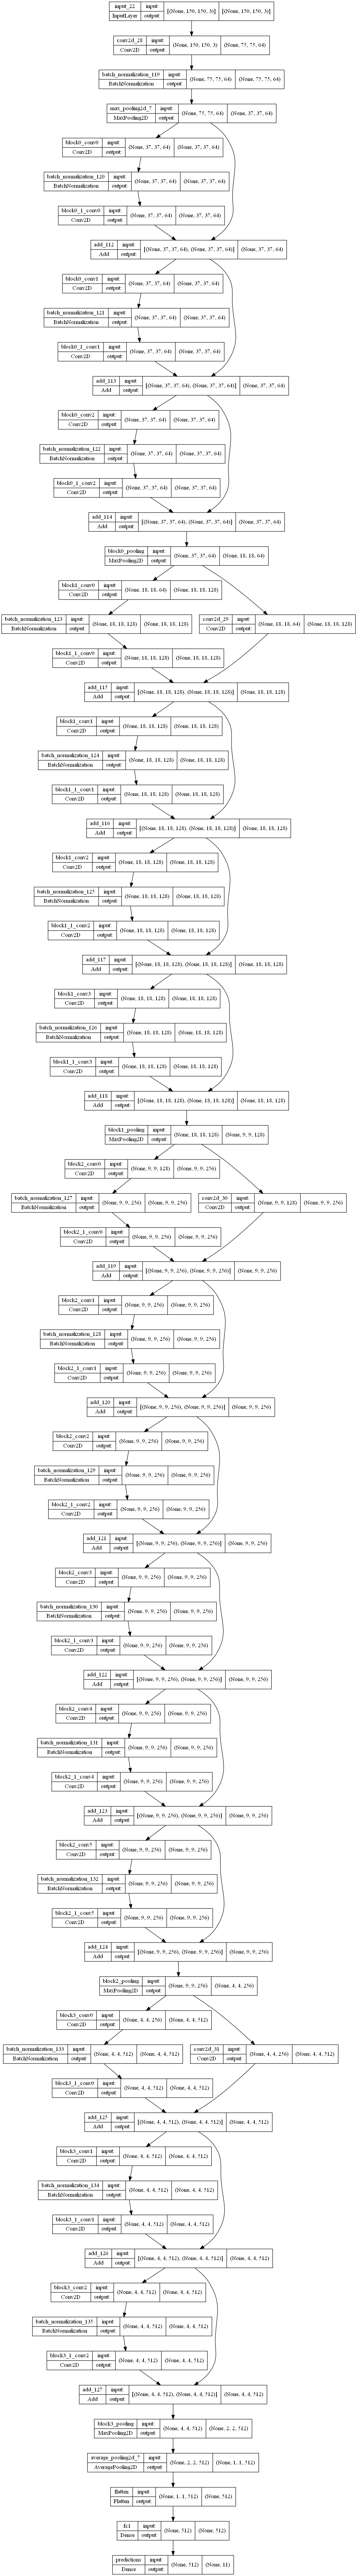

In [92]:
# you can see model summary

tf.keras.utils.plot_model(model, show_shapes=True)

Compiling the Model

In [93]:
from bpmll import bp_mll_loss
import tensorflow as tf
from sklearn.metrics import log_loss, f1_score # not in use right now

# 성능 기반 스케줄링
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)


model.compile(loss = 'binary_crossentropy',
              optimizer= 'adagrad',
              metrics=[tf.compat.v1.losses.log_loss, 'accuracy']

              )

# model.compile(loss = tf.nn.softmax_cross_entropy_with_logits,
#               optimizer= optimizer,
#               metrics=['CategoricalCrossentropy', 'accuracy'])

In [78]:
import sklearn

img_arr_s = sklearn.utils.shuffle(img_arr, random_state=123)
fac_input_s = sklearn.utils.shuffle(fac_input, random_state=123)
clr_input_s = sklearn.utils.shuffle(clr_input, random_state=123)
y_out_s = sklearn.utils.shuffle(y_out, random_state=123)

weigh = np.array([1/42, 1/89, 1/112, 1/370, 1/135, 1/250, 1/47, 1/347, 1/51, 1/230, 1/50])
weigh = weigh * 1205 / 11
cw = {0:weigh[0], 1:weigh[1], 2:weigh[2], 3:weigh[3], 4:weigh[4], 5:weigh[5], 6:weigh[6], 7:weigh[7], 8:weigh[8], 9:weigh[9], 10:weigh[10]}

In [79]:
img_arr_test = img_arr_s[1100:]
fac_inp_test = fac_input_s[1100:]
clr_inp_test = clr_input_s[1100:]
y_out_test = y_out_s[1100:]

img_arr_s = img_arr_s[:1100]
fac_input_s = fac_input_s[:1100]
clr_input_s = clr_input_s[:1100]
y_out_s = y_out_s[:1100]

In [94]:
#with tf.device("/device:GPU:0"):
history = model.fit(
#x=[img_arr_s,fac_input_s, clr_input_s],
x=img_arr_s,
y=y_out_s,
validation_split=0.2,
epochs=400,
callbacks=[lr_scheduler, tf.keras.callbacks.EarlyStopping(patience=10)],
#class_weight = cw,
batch_size=32
)

Epoch 1/400
28/28 [==============================] - 6s 124ms/step - loss: 0.4973 - log_loss: 0.4947 - accuracy: 0.1739 - val_loss: 0.5592 - val_log_loss: 0.5596 - val_accuracy: 0.0591 - lr: 0.0010
Epoch 2/400
28/28 [==============================] - 5s 185ms/step - loss: 0.3855 - log_loss: 0.3853 - accuracy: 0.2182 - val_loss: 0.5510 - val_log_loss: 0.5509 - val_accuracy: 0.0545 - lr: 0.0010
Epoch 3/400
28/28 [==============================] - 2s 90ms/step - loss: 0.3669 - log_loss: 0.3657 - accuracy: 0.2261 - val_loss: 0.4694 - val_log_loss: 0.4693 - val_accuracy: 0.1773 - lr: 0.0010
Epoch 4/400
28/28 [==============================] - 3s 94ms/step - loss: 0.3600 - log_loss: 0.3592 - accuracy: 0.2307 - val_loss: 0.4161 - val_log_loss: 0.4159 - val_accuracy: 0.1318 - lr: 0.0010
Epoch 5/400
28/28 [==============================] - 2s 88ms/step - loss: 0.3492 - log_loss: 0.3487 - accuracy: 0.2307 - val_loss: 0.3972 - val_log_loss: 0.3970 - val_accuracy: 0.1818 - lr: 0.0010
Epoch 6/400
2

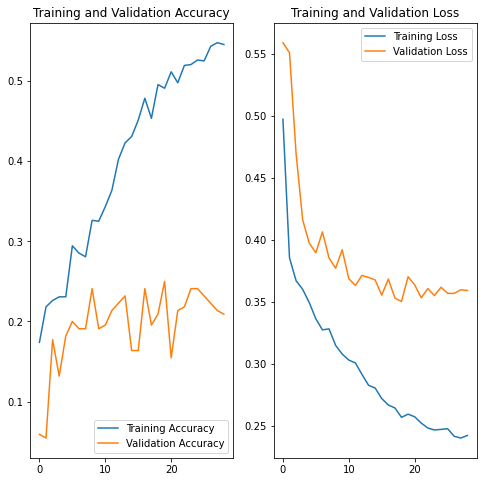

In [95]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(29)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
model.save('./models/ResNet50.h5')
# github 문제로 D드라이브에 저장했음

In [30]:
k = model.predict(img_arr[260:263])

In [53]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.4f}".format(x)})



In [31]:
k 

array([[0.03440069, 0.09901544, 0.01814081, 0.15511066, 0.50941813,
        0.10593298, 0.02063033, 0.05752189, 0.12222853, 0.08644311],
       [0.01836892, 0.0624362 , 0.04514047, 0.46582073, 0.13840081,
        0.48399326, 0.03658346, 0.09091216, 0.02337698, 0.20591444],
       [0.04332389, 0.15144657, 0.02753114, 0.26982802, 0.03832465,
        0.25234807, 0.0197471 , 0.15079133, 0.02742974, 0.4981645 ]],
      dtype=float32)

In [32]:
y_out[260:263] > 0.8

array([[False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False,  True, False,  True,  True, False, False,
         True],
       [ True, False, False, False, False, False, False, False, False,
         True]])

In [33]:
for genre in y_data.columns:
    print(genre, ': ', len(y_data[y_data[genre] == 1]))

Blues :  531
Electronic :  1579
Folk, World, & Country :  826
Funk&Soul :  3284
Hip Hop :  2152
Jazz :  2753
Latin :  335
Pop :  1984
Reggae :  582
Rock :  3308


In [40]:
test_arr = None
count = 0
for path in img_dataset['path']:
    if count > 7000:
        print(path)
        if test_arr is None:
            test_arr = np.expand_dims(load(d_path + path), axis=0)
        else:
            test_arr = np.append(test_arr, np.expand_dims(load(d_path + path), axis=0), axis=0)
    count += 1
    print(count)
    if count > 7020:
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [56]:
k = model.predict(test_arr)

for i in k:
    print(i)

[0.0256 0.0748 0.0544 0.3698 0.2776 0.3038 0.0235 0.0749 0.0157 0.3039]
[0.0684 0.0392 0.0898 0.4329 0.2506 0.2046 0.0075 0.1337 0.0421 0.1517]
[0.0363 0.1098 0.0889 0.1962 0.1144 0.2021 0.0164 0.0952 0.0330 0.1636]
[0.0186 0.0317 0.0351 0.3653 0.5007 0.2927 0.0016 0.0303 0.1350 0.0936]
[0.0338 0.0744 0.0469 0.3731 0.1085 0.1841 0.0334 0.1940 0.0323 0.4101]
[0.0731 0.1246 0.1015 0.2920 0.0456 0.2342 0.0196 0.2806 0.0649 0.2849]
[0.1078 0.1835 0.1014 0.3195 0.0452 0.2134 0.0231 0.2323 0.0474 0.1789]
[0.0359 0.0438 0.0283 0.1511 0.1232 0.4129 0.0117 0.0796 0.1211 0.6267]
[0.0391 0.1207 0.0689 0.2107 0.1562 0.1494 0.0128 0.1840 0.0488 0.0948]
[0.0589 0.0470 0.0896 0.2259 0.3394 0.1843 0.0159 0.1257 0.0262 0.3237]
[0.0556 0.0571 0.0571 0.3002 0.0848 0.2282 0.0339 0.1216 0.0581 0.1470]
[0.6001 0.0037 0.0000 0.0322 0.1213 0.3494 0.0000 0.0000 0.1238 1.0000]
[0.0392 0.0722 0.1352 0.1191 0.0786 0.3406 0.0280 0.0890 0.0524 0.3587]
[0.0245 0.1675 0.0170 0.1688 0.1321 0.2185 0.0068 0.1412 0.0430 

In [49]:
test_out = np.array(y_data)
test_out = test_out[7001:7021]

In [50]:
test_out

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]])

In [63]:
for i in range(20):
    print(k[i])
    print(test_out[i])

[0.0256 0.0748 0.0544 0.3698 0.2776 0.3038 0.0235 0.0749 0.0157 0.3039]
[0.0000 1.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000]
[0.0684 0.0392 0.0898 0.4329 0.2506 0.2046 0.0075 0.1337 0.0421 0.1517]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000]
[0.0363 0.1098 0.0889 0.1962 0.1144 0.2021 0.0164 0.0952 0.0330 0.1636]
[0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0186 0.0317 0.0351 0.3653 0.5007 0.2927 0.0016 0.0303 0.1350 0.0936]
[0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0338 0.0744 0.0469 0.3731 0.1085 0.1841 0.0334 0.1940 0.0323 0.4101]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 1.0000]
[0.0731 0.1246 0.1015 0.2920 0.0456 0.2342 0.0196 0.2806 0.0649 0.2849]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000]
[0.1078 0.1835 0.1014 0.3195 0.0452 0.2134 0.0231 0.2323 0.0474 0.1789]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 

In [48]:
img_dataset.iloc[7001:7021,:]

,master_release,path,dominant_r,dominant_g,dominant_b,gender,age,dominant_race,emotion,Blues,...,"Folk, World, & Country",Funk&Soul,Hip Hop,Jazz,Latin,Non-Music,Pop,Reggae,Rock,Stage & Screen
10646,10180,multi\Electronic+Jazz\10180.jpeg,88,62,52,0,0,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,2229160,Rock\2229160.jpeg,125,97,98,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2525,17278,Funk&Soul\17278.jpeg,60,91,93,0,0,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5090,59278,Hip Hop\59278.jpeg,104,78,67,0,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13813,20915,multi\Rock+Pop\20915.jpeg,127,111,125,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8503,111912,Rock\111912.jpeg,213,185,159,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8507,11213,Rock\11213.jpeg,161,131,105,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1690,601678,"Folk, World, & Country\601678.jpeg",91,38,44,0,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11028,2156965,multi\Electronic+Rock+Pop\2156965.jpeg,236,144,142,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10011,7603,Rock\7603.jpeg,55,52,50,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
